In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from time import sleep
from tqdm import tqdm
%matplotlib inline

In [2]:
# Read Data
test = data.DataReader(['TSLA', 'FB'], 'yahoo', start='2018/01/01', end='2019/12/31')
test.head()

Attributes  Adj Close                  Close                   High  \
Symbols          TSLA          FB       TSLA          FB       TSLA   
Date                                                                  
2018-01-02  64.106003  181.419998  64.106003  181.419998  64.421997   
2018-01-03  63.450001  184.669998  63.450001  184.669998  65.050003   
2018-01-04  62.924000  184.330002  62.924000  184.330002  63.709999   
2018-01-05  63.316002  186.850006  63.316002  186.850006  63.448002   
2018-01-08  67.281998  188.279999  67.281998  188.279999  67.403999   

Attributes                    Low                   Open              \
Symbols             FB       TSLA          FB       TSLA          FB   
Date                                                                   
2018-01-02  181.580002  62.200001  177.550003  62.400002  177.679993   
2018-01-03  184.779999  63.110001  181.330002  64.199997  181.880005   
2018-01-04  186.210007  61.136002  184.100006  62.574001  184.899994   
2018-01-05  186.899994  62.400002  184.929993  63.324001  185.589996   
2018-01-08  188.899994  63.099998  186.330002  63.200001  187.199997   

Attributes    Volume            
Symbols         TSLA        FB  
Date                            
2018-01-02  21761000  18151900  
2018-01-03  22607500  16886600  
2018-01-04  49731500  13880900  
2018-01-05  22956000  13574500  
2018-01-08  49297000  17994700

In [3]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,TSLA,FB
Date,,
2018-01-02,64.106003,181.419998
2018-01-03,63.450001,184.669998
2018-01-04,62.924000,184.330002
2018-01-05,63.316002,186.850006
2018-01-08,67.281998,188.279999


In [4]:
# Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

In [5]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0011483734269334606

In [6]:
# Log of Percentage change for Facebook
fb = test['FB'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

Date
2018-01-02         NaN
2018-01-03    0.017756
2018-01-04   -0.001843
2018-01-05    0.013579
2018-01-08    0.007624
Name: FB, dtype: float64

In [7]:
# Variance
var_fb = fb.var()
var_fb

0.0004569725841702254

In [8]:
'''
But volatility for the annual standard deviation. 
What we get from square root of variance is the daily standard deviation. 
To convert it to annual standard deviation we multiply the variance by 252.
'''
# Volatility - 252 trading days in a year
trading_days = 252
tesla_vol = np.sqrt(var_tesla * trading_days)
fb_vol = np.sqrt(var_fb * trading_days)
tesla_vol, fb_vol


(0.5379499080650838, 0.33934803846625783)

<AxesSubplot:xlabel='Date'>

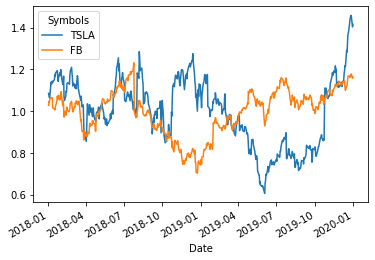

In [9]:
# Historic Price change of both stocks (Normalised)
tsla_mean = test['TSLA'].mean()
fb_mean = test['FB'].mean()
test_n = test
test_n['TSLA'] = test['TSLA'].apply(lambda x: x/tsla_mean)
test_n['FB'] = test['FB'].apply(lambda x: x/fb_mean)

test_n[['TSLA','FB']].plot()


<AxesSubplot:xlabel='Symbols'>

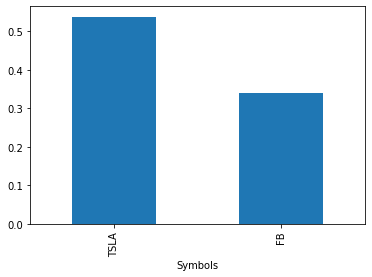

In [10]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(trading_days)).plot(kind='bar')

In [11]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()


Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


In [12]:
# Covariance
test1['TSLA'].cov(test1['FB'])
'''
You can notice that there is small positive covariance between Tesla and Facebook.
'''

'\nYou can notice that there is small positive covariance between Tesla and Facebook.\n'

In [13]:
'''
Correlation, in the finance and investment industries, 
is a statistic that measures the degree to which two securities move in relation to each other. 
Correlations are used in advanced portfolio management, computed as the correlation coefficient, 
which has a value that must fall between -1.0 and +1.0.
You can think of correlation as a scaled version of covariance, 
where the values are restricted to lie between -1 and +1.
'''

test1['TSLA'].corr(test1['FB'])

0.25208832724661323

In [14]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


In [15]:
'''
Let’s define an array of weights for the purpose of calculation. 
These weights will represent the percentage allocation of investments between these two stocks. 
They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of weights 
that maximizes expected returns while minimizing the risk (standard deviation).
'''

# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA    0.000530
FB      0.000246
dtype: float64

In [16]:
'''
Expected return of a portfolio = weight of stock 1 * expected return of stock 1 + 
                                 weight of stock 2 * expected return of stock 2 + 
                                 ...
                                 for all stocks in a portfolio
'''

# Total expected return
e_r = (e_r_ind*w).sum()
e_r

0.0003027691524101095

In [17]:
'''
Now that you have gone through the building blocks of portfolio optimization, 
it is time to create an optimal portfolio using the same concepts.

We will be using stocks from 4 companies, namely, 
Apple, Nike, Google and Amazon for a period of 5 years for demonstration.
You will learn to calculate the weights of assets for each one. 
Then, we will calculate the expected returns, 
minimum variance portfolio, optimal risky portfolio and efficient frontier. 
You will also learn a new term called Sharpe Ratio.
'''

# Import data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')

# Closing price
df = df['Adj Close']
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2014-12-31,25.020115,44.705845,530.659973,310.350006
2015-01-02,24.782118,44.185101,529.549988,308.519989
2015-01-05,24.083961,43.473705,519.460022,302.190002
2015-01-06,24.086231,43.217979,506.640015,295.290009
2015-01-07,24.423965,44.110710,505.149994,298.420013


In [18]:
'''
Creating a covariance matrix for the covariance between each stock in our portfolio.
'''
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000245,0.000084,0.000122,0.000142
NKE,0.000084,0.000219,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000221,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


In [19]:
'''
Creating a correlation matrix for the correlation between each stock in our portfolio.


Note:
A correlation of -1 means negative relation, i.e, 
if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, 
if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, 
they dont have any effect on each other.

Hence assets always have positive correlation of 1 with itself.
'''
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.361188,0.524819,0.496704
NKE,0.361188,1.000000,0.387448,0.341680
GOOGL,0.524819,0.387448,1.000000,0.647952
AMZN,0.496704,0.341680,0.647952,1.000000


In [20]:
'''
The formula for calculating portfolio variance differs from the usual formula of variance.

The simplest way to do this complex calculation is defining a list of weights 
and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. 
Remember that sum of weights should always be 1.
'''

w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016069831804150917

In [21]:
'''
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets 
give us expected return for the portfolio.
'''

# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er


Symbols
AAPL     0.282997
NKE      0.192698
GOOGL    0.217545
AMZN     0.472289
dtype: float64

In [22]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.27006940936779755

In [23]:
'''
The aim of going through all the topics above is to plot the efficient frontier. 
The Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. 
It shows us the maximum return we can get for a set level of volatility, 
or conversely, the volatility that we need to accept for certain level of returns.

Below, you can see the calculations and code for finding the optimal weights of assets 
and plotting the efficient frontier for a given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.
'''

# Volatility is given by the annual standard deviation. We multiply by 250 because there are 252 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(trading_days))
ann_sd

Symbols
AAPL     0.248723
NKE      0.234737
GOOGL    0.236130
AMZN     0.289711
dtype: float64

In [24]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.282997,0.248723
NKE,0.192698,0.234737
GOOGL,0.217545,0.236130
AMZN,0.472289,0.289711


In [25]:
'''
Creating random points to plot the efficient frontier
'''

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(trading_days) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.223577,0.189319,0.147327,0.394765,0.433576,0.024332
1,0.252266,0.192543,0.204941,0.249935,0.437103,0.108021
2,0.215135,0.191073,0.090893,0.450401,0.447587,0.011119
3,0.240070,0.200906,0.361268,0.106324,0.526437,0.005970
4,0.298868,0.207400,0.445584,0.058056,0.285950,0.210410


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

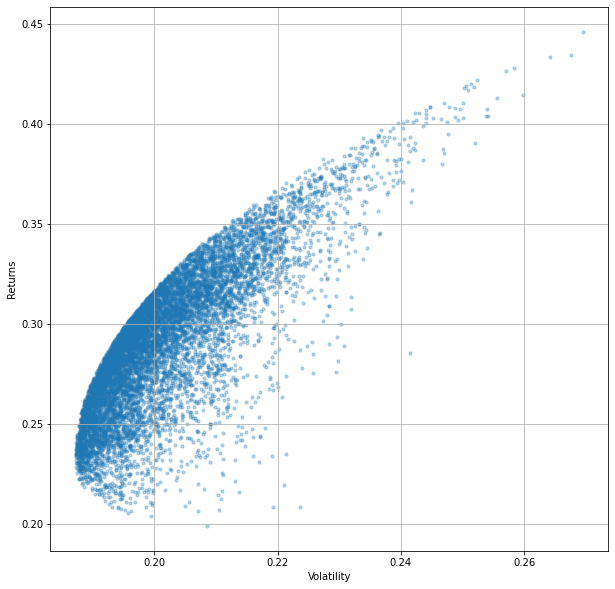

In [26]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [27]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns         0.234780
Volatility      0.187253
AAPL weight     0.250406
NKE weight      0.418116
GOOGL weight    0.287379
AMZN weight     0.044099
Name: 9065, dtype: float64

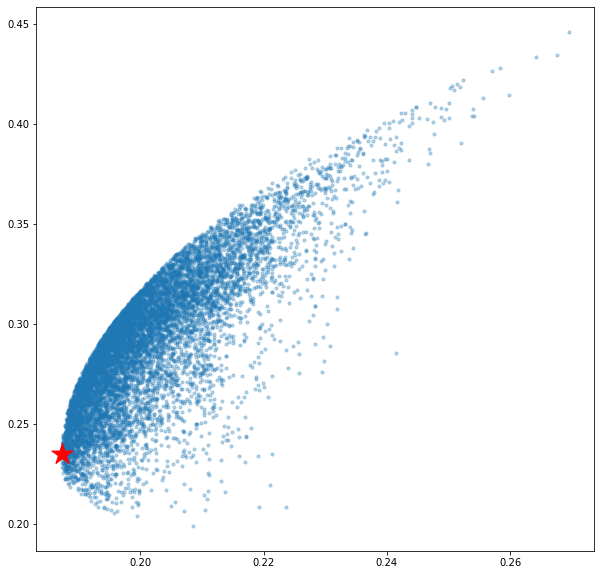

In [28]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [29]:
'''
It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, 
but you will notice that the return on this portfolio is pretty low. 
Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?

This is done by using a parameter called the Sharpe Ratio.

The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. 
Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, 
meaning it’s the return investors could expect for taking no risk.
The optimal risky portfolio is the one with the highest Sharpe ratio. 
The formula for this ratio is:

(Return of portfolio - Risk-free rate) / Standard deviation of the portfolio
'''

'\nIt is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.\n\nWe found the portfolio with minimum volatility, \nbut you will notice that the return on this portfolio is pretty low. \nAny sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.\n\nThe question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?\n\nThis is done by using a parameter called the Sharpe Ratio.\n\nThe Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. \nVolatility is a measure of the price fluctuations of an asset or portfolio.\n\nThe risk-free rate of return is the return on an investment with zero risk, \nmeaning it’s the return investors could expect for taking no risk.\nThe optimal risky portfolio is the one with the highest Sharpe ratio. \nThe formula for this ratio is:\n\n(Return of portfolio -

In [30]:
'''
An optimal risky portfolio can be considered as one that has highest Sharpe ratio.
'''

# Finding the optimal portfolio
rf = 0.01 # risk-free rate - US Government Bond
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.382338
Volatility      0.227336
AAPL weight     0.213358
NKE weight      0.173850
GOOGL weight    0.003756
AMZN weight     0.609036
Name: 7254, dtype: float64

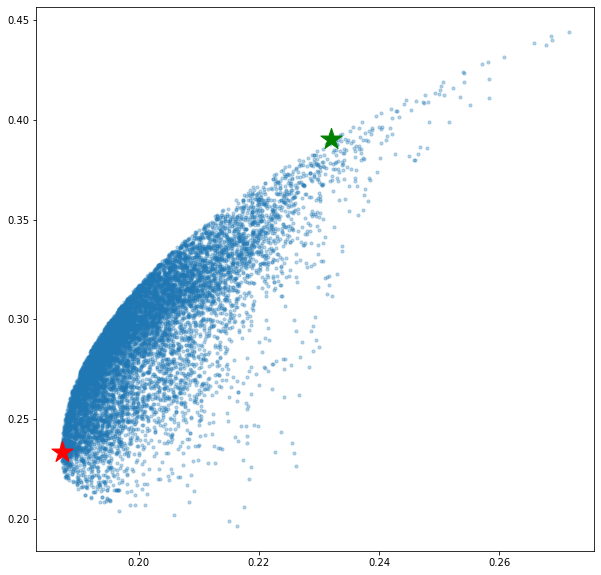

In [34]:
'''
You can notice that while the difference in risk between minimum volatility portfolio 
and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
'''

# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)